<a href="https://colab.research.google.com/github/hochi57/KU_DFC/blob/master/%5BKU%5D_NLP_Final_Project_English_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글드라이브에 러닝 파일 올려 두고
# 구글드라이브 마운팅 하기

from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# 러닝 파일 확인하기

!ls /content/gdrive/My\ Drive/DFC/인공지능과자연어처리

friends_dev.json   friends_train.json  ratings_train.txt
friends_test.json  ratings_test.txt    ratings.txt


In [ ]:
# 1) Raw Data 이해

import pandas as pd
import numpy as np

file_path_1 = '/content/gdrive/My Drive/DFC/인공지능과자연어처리/friends_train.json'
file_path_2 = '/content/gdrive/My Drive/DFC/인공지능과자연어처리/friends_test.json'

import json

with open(file_path_1, "r") as f:
  json_train_data = f.read()

json_train_list = json.loads(json_train_data)
json_train_df = pd.DataFrame(json_train_list)

with open(file_path_2, "r") as f:
  json_test_data = f.read()

json_test_list = json.loads(json_test_data)
json_test_df = pd.DataFrame(json_test_list)

In [ ]:
"""
annotation_text = ""
emotion_text = ""
speaker_text = ""
utterance_text = ""

for i in range(len(json_list)):
  for j in range(len(json_list[i])):
    
    annotation_text = annotation_text + " " + json_list[i][j]['annotation']
    emotion_text = emotion_text + " " + json_list[i][j]['emotion']
    speaker_text = speaker_text + " " + json_list[i][j]['speaker']
    utterance_text = utterance_text + " " + json_list[i][j]['utterance']
"""

In [ ]:
annotation_train_list = []
emotion_train_list = []
speaker_train_list = []
utterance_train_list = []

for i in range(len(json_train_list)):
  for j in range(len(json_train_list[i])):
    
    annotation_train_list.append(json_train_list[i][j]['annotation'])
    emotion_train_list.append(json_train_list[i][j]['emotion'])
    speaker_train_list.append(json_train_list[i][j]['speaker'])
    utterance_train_list.append(json_train_list[i][j]['utterance'])

In [ ]:
annotation_test_list = []
emotion_test_list = []
speaker_test_list = []
utterance_test_list = []

for i in range(len(json_test_list)):
  for j in range(len(json_test_list[i])):
    
    annotation_test_list.append(json_test_list[i][j]['annotation'])
    emotion_test_list.append(json_test_list[i][j]['emotion'])
    speaker_test_list.append(json_test_list[i][j]['speaker'])
    utterance_test_list.append(json_test_list[i][j]['utterance'])

In [ ]:
train_df1 = pd.DataFrame(data=utterance_train_list, columns=['utterance'])
train_df2 = pd.DataFrame(data=emotion_train_list, columns=['emotion'])
train_df = pd.merge(train_df1, train_df2, left_index=True, right_index=True)

test_df1 = pd.DataFrame(data=utterance_test_list, columns=['utterance'])
test_df2 = pd.DataFrame(data=emotion_test_list, columns=['emotion'])
test_df = pd.merge(test_df1, test_df2, left_index=True, right_index=True)

In [ ]:
print(train_df)
print(test_df)

                                               utterance      emotion
0      also I was the point person on my companys tr...      neutral
1                       You mustve had your hands full.      neutral
2                                That I did. That I did.      neutral
3          So lets talk a little bit about your duties.      neutral
4                                 My duties?  All right.     surprise
...                                                  ...          ...
10556                                         You or me?      neutral
10557  I got it. Uh, Joey, women don't have Adam's ap...  non-neutral
10558               You guys are messing with me, right?     surprise
10559                                              Yeah.      neutral
10560  That was a good one. For a second there, I was...  non-neutral

[10561 rows x 2 columns]
                                              utterance      emotion
0     Why do all youre coffee mugs have numbers on ...     surpr

In [ ]:
X_train = train_df['utterance']
Y_train = train_df['emotion']

X_test = test_df['utterance']
Y_test = test_df['emotion']

리뷰의 최대 길이 : 327
리뷰의 평균 길이 : 39.68478363791308


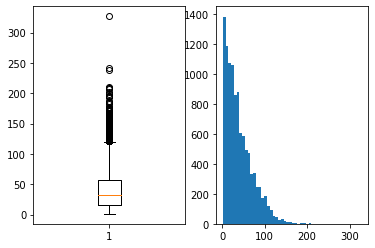

In [ ]:
# 1) 데이터셋 확인 - X
%matplotlib inline
import matplotlib.pyplot as plt

len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)

plt.show()

NameError: ignored

각 레이블에 대한 빈도수:
[['anger' 'disgust' 'fear' 'joy' 'neutral' 'non-neutral' 'sadness'
  'surprise']
 [513 240 185 1283 4752 2017 351 1220]]


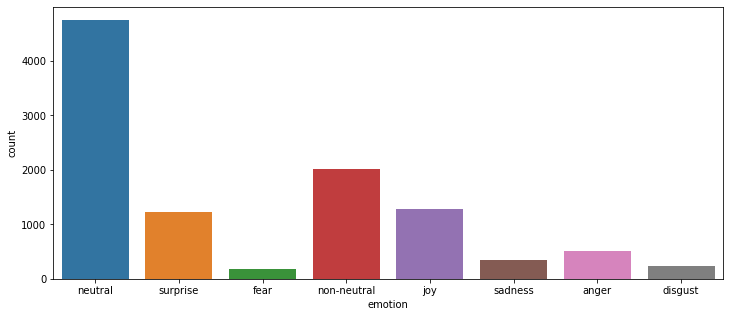

In [ ]:
# 1) 데이터셋 확인 - Y
import seaborn as sns

unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(Y_train)

In [ ]:
# 2) X - Text 전처리
# 2-1) Text Cleaning & Normalization

# Null 확인
X_train.isnull().sum()
X_test.isnull().sum()

# Null 제거
X_train = X_train.fillna('')
X_test = X_test.fillna('')

import re

# sub모듈을 통해 '\([^])'표현이나 '공백' 제거
X_train = X_train.str.replace("[^a-zA-Z ]","")
X_test = X_test.str.replace("[^a-zA-Z ]","")

# Ascii Code 반환
X_train = X_train.apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
X_test = X_test.apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [ ]:
# 2-2) Removing Stopwords

import nltk
nltk.download('stopwords') # 불용어
from nltk.corpus import stopwords

# 불용어 정리 - 알파벳만 추출
stop_words = set(stopwords.words('english')) 

import string
valid_characters = string.printable

X_train = X_train.apply(lambda x: ''.join([ i for i in x if i not in stop_words]))
X_train = X_train.apply(lambda x: ''.join([ i for i in x if i in valid_characters]))

X_test = X_test.apply(lambda x: ''.join([ i for i in x if i not in stop_words]))
X_test = X_test.apply(lambda x: ''.join([ i for i in x if i in valid_characters]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train

0        l I w he pn pern n  cpn rnn fr he KL  GR e
1                               Yu uve h ur hn full
2                                       Th I  Th I 
3                           S le lk  lle b bu ur ue
4                                     M ue  All rgh
                            ...                    
10556                                        Yu r e
10557                   I g  Uh Je wen n hve A pple
10558                         Yu gu re eng wh e rgh
10559                                           Yeh
10560            Th w  g ne Fr  ecn here I w lke wh
Name: utterance, Length: 10561, dtype: object

In [ ]:
X_train[0]

'l I w he pn pern n  cpn rnn fr he KL  GR e'

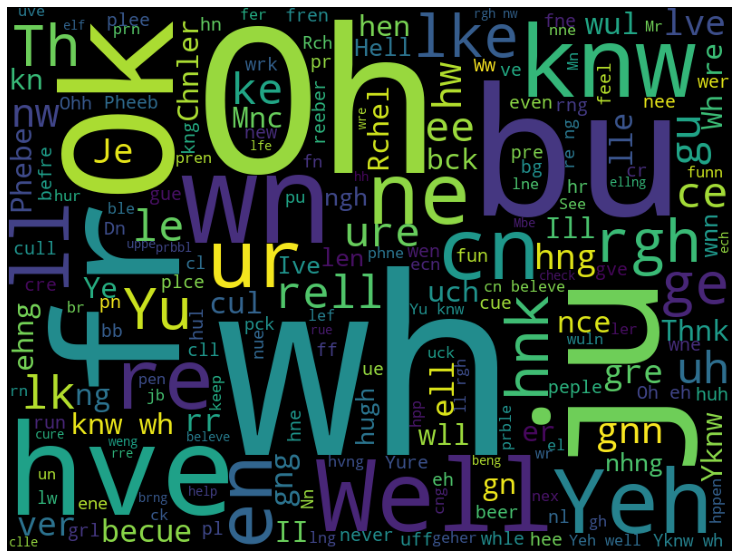

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width=800, height=600).generate(' '.join(X_train))

plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [ ]:
# 2) X - Text 전처리
# 2-3) Text 학습 준비(Train / Test)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['Resume'], data['Category'], test_size=0.3)

In [ ]:
# 2) X - Text 전처리
# 2-3) Text 학습 준비(Train / Test)

print('훈련용 자소서 개수 : {}'.format(len(x_train)))
print('테스트용 자소서 개수 : {}'.format(len(x_test)))
num_classes = len(y_train)
print('부서 카테고리 : {}'.format(num_classes))

훈련용 자소서 개수 : 853
테스트용 자소서 개수 : 366
부서 카테고리 : 853


In [ ]:
# 2) X - Text 전처리
# 2-4) Text Tokenization - Library 소환 

import nltk
nltk.download('punkt') # 토큰화
nltk.download('wordnet')   # 표제어 추출

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# 2) X - Text 전처리
# 2-4) Text Tokenization - Train

from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

token_pattern = r"\w+"

x_train_encoded = []
for sentence in x_train:
    temp_X = []
    temp_X = regexp_tokenize(sentence, token_pattern)
    x_train_encoded.append(temp_X)

In [ ]:
# 2) X - Text 전처리
# 2-4) Text Tokenization - Test

x_test_encoded = []
for sentence in x_test:
    temp_X = []
    temp_X = regexp_tokenize(sentence, token_pattern)
    x_test_encoded.append(temp_X)

In [ ]:
print( "단어 토큰: ", len(x_train_encoded))

단어 토큰:  853


In [ ]:
x_train_encoded[:5]

[['bJANE',
  'DOEnFreerck',
  'MD',
  'C',
  'jneelehcnnSENIOR',
  'SALES',
  'LEADERnBune',
  'Develpen',
  'xexx',
  'Grwh',
  'Srege',
  'xexx',
  'Drvng',
  'SlenPerfrnce',
  'rven',
  'wr',
  'wnnng',
  'regcne',
  'le',
  'leer',
  'wh',
  'ver',
  'er',
  'f',
  'enrenucce',
  'n',
  'gnng',
  'rke',
  'hre',
  'hrugh',
  'pleenn',
  'f',
  'le',
  'rege',
  'h',
  'nfluence',
  'ecn',
  'kernn',
  'rve',
  'ucce',
  'Cnenl',
  'uccee',
  'n',
  'evelpng',
  'cprehenve',
  'rege',
  'pn',
  'prucnprcng',
  'n',
  'rkeng',
  'cheve',
  'rgee',
  'le',
  'grwh',
  'whle',
  'nnng',
  'crpre',
  'n',
  'brn',
  'negrnRecgnze',
  'fr',
  'ulzng',
  'nnvve',
  'pprche',
  'n',
  'r',
  'bune',
  'ecn',
  'cheve',
  'rke',
  'pnngnn',
  'le',
  'rgennLEADERSHIP',
  'COMPETENCIESnEnrepreneurhp',
  'xexx',
  'Accun',
  'Mngeen',
  'xexx',
  'Cuer',
  'Enggeen',
  'xexx',
  'Bune',
  'Develpen',
  'xexx',
  'CrFuncnl',
  'Te',
  'Wrk',
  'xexx',
  'PL',
  'Accunbl',
  'xexx',
  'Sregc',


In [ ]:
# 2) X - Text 전처리
# 2-5) 정수 Indexing - Train / Test

from tensorflow.keras.preprocessing.text import Tokenizer

# 상위 35,000개의 단어만 보존
max_words = 35000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train_encoded)
x_train_encoded = tokenizer.texts_to_sequences(x_train_encoded)
x_test_encoded = tokenizer.texts_to_sequences(x_test_encoded)

In [ ]:
# 정수 인덱싱된 자소서 확인
print(x_train_encoded[0])

[6839, 26223, 671, 26, 26224, 2203, 26225, 159, 7, 478, 1995, 7, 5987, 26226, 1611, 108, 2473, 26227, 15, 95, 5, 119, 34, 2, 26228, 1, 1960, 241, 378, 88, 343, 2, 15, 402, 8, 2653, 124, 26229, 1005, 1038, 1030, 2038, 1, 352, 1069, 402, 28, 26230, 1, 140, 539, 1456, 15, 478, 358, 560, 219, 1, 452, 26231, 4, 710, 869, 2654, 1, 10, 24, 124, 539, 241, 13516, 15, 26232, 26233, 7, 690, 51, 7, 38, 1576, 7, 24, 159, 7, 1672, 138, 32, 7, 199, 6840, 7, 1057, 155, 7, 220, 7, 3674, 6841, 26234, 26235, 26236, 26237, 26238, 621, 7, 5387, 671, 7, 26239, 2474, 1, 307, 15, 532, 1133, 1, 3, 13517, 2, 446, 796, 13518, 671, 1795, 478, 2, 24, 88, 1796, 2, 706, 140, 87, 1, 26240, 307, 1133, 2408, 719, 1, 1134, 1058, 971, 4, 1133, 26241, 1286, 1, 1612, 943, 4, 324, 111, 198, 1, 26242, 283, 32, 1, 13519, 6842, 261, 114, 1, 26243, 106, 1, 5388, 88, 574, 2, 1612, 26244, 1639, 20, 26245, 11, 2, 535, 1, 118, 1, 329, 15, 2, 13520, 5389, 88, 290, 26246, 8, 1, 4, 384, 26247, 58, 26248, 1, 1753, 5, 20, 13521, 2, 1352

학습 자소서의 최대 길이 : 7238
학습 자소서의 평균 길이 : 621.293083235639


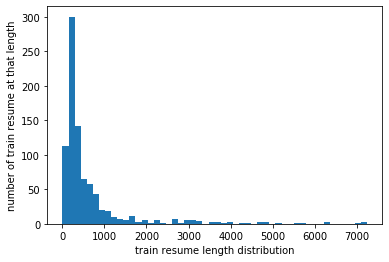

In [ ]:
# 정수 인덱싱된 자소서 분포 확인

%matplotlib inline
import matplotlib.pyplot as plt

print('학습 자소서의 최대 길이 :',max(len(l) for l in x_train_encoded))
print('학습 자소서의 평균 길이 :',sum(map(len, x_train_encoded))/len(x_train_encoded))
plt.hist([len(s) for s in x_train_encoded], bins=50)
plt.xlabel('train resume length distribution')
plt.ylabel('number of train resume at that length')
plt.show()

In [ ]:
# 2) X - Text 전처리
# 2-6) Text Padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

# 전체 데이터의 길이는 800으로 맞춘다.
max_len=800
x_train_encoded = pad_sequences(x_train_encoded, maxlen=max_len)
x_test_encoded = pad_sequences(x_test_encoded, maxlen=max_len)

In [ ]:
x_train_encoded[495]

array([   45,    18,    18,    18,    18,    18,    18,    18,    18,
          18,    18,    18,  2317,    18,    18,    18,   606,    45,
          18,    18,    18,    18,    18,  9651, 23693,    45,  6773,
          18,    45,    18,    18,    18,    18,    18,    18,    18,
          18,    18,    18,    18,    18,    18,    18,    18,  7856,
       23694,  6773,    18,    45,    18,    18,    18,    18,    18,
          18,    18,    18,    18,    18,    18,    18,    18,    18,
          18,   606,    45,    18,    18,    18,    18,    18,    18,
          18,    18,    18,    18,    18,    18,    18,    18,    18,
          18,    18,    18,    18,    18,    18,    18,    18,    18,
          18,    18,    18, 23694,    45,  2957,    45,    18,    18,
        9650,   606, 23695,   843,  2957,  6774, 13033,  6774,  9651,
       23696, 23697,   903,  9652, 23698, 13034,  9653,    45,  9654,
          18,    18,    18,    18,    18,    18,    18,    18,    18,
          18,    18,

부서명의 최대 길이 : 23
부서명의 평균 길이 : 10.916764361078545


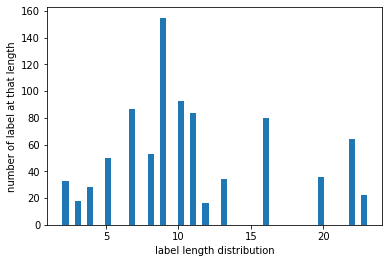

In [ ]:
# 3) Y - Label 전처리
# Label 분포 확인

%matplotlib inline
import matplotlib.pyplot as plt

print('부서명의 최대 길이 :',max(len(l) for l in y_train))
print('부서명의 평균 길이 :',sum(map(len, y_train))/len(y_train))
plt.hist([len(s) for s in y_train], bins=50)
plt.xlabel('label length distribution')
plt.ylabel('number of label at that length')
plt.show()

In [ ]:
# 3) Y - Label 전처리
# Label 분포 확인

unique_elements, counts_elements = np.unique(y_train, return_counts=True)

print("각 레이블 이름 / 각 레이블에 해당하는 자소서: ")
print(np.asarray((unique_elements, counts_elements)))

각 레이블 이름 / 각 레이블에 해당하는 자소서: 
[['Accountant' 'Advocate' 'Agricultural' 'Apparel' 'Architects' 'Arts'
  'Automobile' 'Aviation' 'BPO' 'Banking' 'Building & Construction'
  'Business Development' 'Consultant' 'Designing' 'Digital Media'
  'Education' 'Engineering' 'Finance' 'Food & Beverages' 'HR'
  'Health & Fitness' 'Information Technology' 'Managment'
  'Public Relations' 'Sales']
 [47 42 16 10 7 28 21 11 18 33 22 36 18 42 34 63 84 44 18 33 55 64 50 7
  50]]


In [ ]:
# 3) Y - Label 전처리
# Label 분포 확인

print("레이블 갯수: ", len(unique_elements))

레이블 갯수:  25


In [ ]:
# 3) Y - Label 전처리
# Label Indexing - Train / Test
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
encoder = LabelEncoder()

# y_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)

# y_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
for label in np.unique(y_test):
    if label not in encoder.classes_: # unseen label 데이터인 경우( )
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
y_test_encoded = encoder.transform(y_test)

In [ ]:
print(y_test, "==>", y_test_encoded)

973     Engineering
819         Finance
965     Engineering
911     Engineering
1119        Banking
           ...     
964     Engineering
633           Sales
934     Engineering
815         Finance
822         Finance
Name: Category, Length: 366, dtype: object ==> [16 17 16 16  9 17  5 15 21 15 15 23 22 15  1  5 11 16 24 10 21  2  6 21
 13 14 14  0  9 22 13 22  4  8 21 15 20  2 19  1  7 14 16 16 24 14 15 15
  0 22 15 21 16 20 22 18 17 21 14 21 13 14  3 16  2 17  0  3  1 21 17 15
 21  9 15 15 15 11  0  1  6 17 15 16 22 16 16  9  6  5 22  0 22 21 16 20
 19 16 20 22 13 24 16 22 11 15 12 16  0  1 17  5 16  4 21  5 20 14  9  6
 15 21 21 21 24 21 21 22  4 21 21 16 17 16 23 22 15 20  2 21  1  1 16 22
 17  8 15  8 20 20 22 21 21  9 15 20 13 14 14  1 14 20  1  0  9 15 14 15
 21  8 20 15 16  0 23 13  1 11 15 16 20  0 17 24 15 21 12 15 14 23 15 19
  2  4 17  6 14 22 21  2 16  0 16 18 21 13 24  8 21  3 20 17 22  5 16 20
 21  9 20  1 24 12 15  1 17 23 14 14 14 21 17 22 15  3  5 11 15 14  9 15
  0

In [ ]:
y_train_encoded

array([24, 14, 21,  1, 23, 10, 24,  1,  1, 17, 22,  0, 20,  0,  0, 17, 16,
       16,  2,  5, 13, 17,  9,  1, 24,  1, 16,  0, 11, 18,  2, 11, 24, 22,
       22,  7,  1, 14,  1,  0, 16, 16, 13, 15,  0, 13, 22, 24, 15, 16, 24,
       11, 24, 16, 22, 17, 15, 16, 21, 21, 11, 14,  2,  0,  1, 16, 16, 21,
       16, 21, 22, 15, 22, 22, 20, 10, 22, 20,  9, 18, 20, 24, 16,  9,  7,
       22, 24, 13, 12, 11,  3, 21, 13, 10, 15, 17,  8, 17,  8,  4,  1, 17,
       20, 14, 20,  0, 21, 14, 12, 23, 20, 21, 15, 24, 10, 17, 24, 24, 13,
       19,  0,  0,  2, 15,  5,  0, 16, 11, 17,  8,  9, 13, 16, 20, 20,  6,
       14, 14, 22, 24, 17, 14, 18, 21,  1,  0, 17, 13, 13, 12, 20,  3,  1,
       16, 18,  7, 24,  6,  6,  7, 16,  8, 17, 21, 20, 21,  9,  9, 15,  5,
       17, 15, 21,  5, 22, 21, 16, 15, 11, 10, 10, 21, 18,  9,  2, 20, 17,
       24, 22, 16,  1, 11, 15, 15, 10,  1, 21,  1, 21, 11,  9, 20, 12, 20,
       24,  8, 24, 16, 16,  8, 17, 22, 14, 18, 15,  8,  2,  9,  0, 10, 19,
       16, 22, 12,  0, 22

In [ ]:
# 4) Model 설계
# LSTM으로 자소서 내용과 부서 카테고리 분류의 패턴을 찾아, 자동으로 자소서만보고 부서 분류하는 모델 만들기

from keras import layers
from tensorflow.keras.layers import Embedding, Flatten, GRU, LSTM, Dense
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [ ]:
# 모델 목표값 데이터를 전처리
# 부서 카테고리 번호 1, 2, 3, 4를 그대로 사용하면 정수의 의미를 가지기 때문에 원핫인코딩으로 처리해 준다

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

In [ ]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train_encoded.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train_encoded.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test_encoded.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test_encoded.shape))

훈련 샘플 문장의 크기 : (853, 800)
훈련 샘플 레이블의 크기 : (853, 25)
테스트 샘플 문장의 크기 : (366, 800)
테스트 샘플 레이블의 크기 : (366, 25)


In [ ]:
# 사용할 모델 정의
model = Sequential()
# 인풋에서 자동으로 피쳐를 뽑을 수 있게 임베딩(입력단어 갯수, 뽑을 피쳐 수, 입력문장 길이))
# Embedding 층의 출력 크기는 (samples, maxlen, 128)
model.add(Embedding(max_words, 128, input_length=max_len))

# 임베딩 된 데이터 위에 LSTM 신경망 연결 시킴 1 Layer
model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
# 임베딩 된 데이터 위에 LSTM 신경망 연결 시킴 2 Layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼침
model.add(Flatten())

# Fully Connected 층 추가
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
# Fully Connected 층 추가

# 분류기
# 마지막 아웃풋을 도출하기위한 출력층 연결(분류해야 할 것 = 부서 카테고리 = 총 25개)
model.add(Dense(25, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
# 학습 목표 정의
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습하기 - train data
# 검증하기 - test data
history = model.fit(x_train_encoded, y_train_encoded, batch_size=64, epochs=5, validation_data=(x_test_encoded, y_test_encoded))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 853 samples, validate on 366 samples
Epoch 1/5
853/853 [==============================] - 85s 99ms/sample - loss: 3.2102 - acc: 0.0715 - val_loss: 3.1516 - val_acc: 0.1093
Epoch 2/5
853/853 [==============================] - 82s 96ms/sample - loss: 3.1469 - acc: 0.0774 - val_loss: 3.0925 - val_acc: 0.1011
Epoch 3/5
853/853 [==============================] - 80s 94ms/sample - loss: 3.0371 - acc: 0.0996 - val_loss: 3.0032 - val_acc: 0.1011
Epoch 4/5
853/853 [==============================] - 80s 94ms/sample - loss: 2.7853 - acc: 0.1313 - val_loss: 2.9824 - val_acc: 0.0847
Epoch 5/5
853/853 [==============================] - 79s 93ms/sample - loss: 2.5979 - acc: 0.1583 - val_loss: 3.0375 - val_acc: 0.1038


In [ ]:
# 사실 이미 위에서 학습(train)하고 검증(test)도 완료 했지만
# 학습한 패턴으로 적용해보기 - test data
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test_encoded, y_test_encoded)[-1]))

366/366 [==============================] - 6s 17ms/sample - loss: 3.0375 - acc: 0.1038

 테스트 정확도: 0.1038


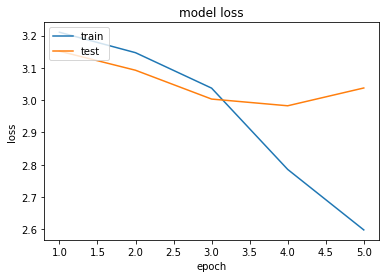

In [ ]:
# LSTM이 반복하면서 학습의 성능을 높여 나가는 과정을 눈으로 보기
# 학습의 성능이 높아질 수록 검증의 성능도 높아지는데
# 학습의 성능과 검증의 성능이 과도하게 차이가 난다면 그건 과적합
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()